### Sobre o notebook

Este notebook abrange as etapas iniciais de um projeto de Machine Learning, focando na obtenção, leitura e análise exploratória de dados de churn de clientes. Em seguida, são abordadas as técnicas de pré-processamento de dados, como a transformação de variáveis categóricas e a normalização de variáveis numéricas. Por fim, o notebook apresenta a construção e avaliação de modelos de classificação, incluindo um modelo de base, uma árvore de decisão e o algoritmo KNN, culminando na seleção e serialização do melhor modelo para uso futuro.

# Obtendo e explorando os dados

### Etapa 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Iremos realizar a leitura da base de dados e verificar a presença de dados nulos.

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/churn.csv')

In [ ]:
dados.head()

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
dados['pais'].value_counts()

,count
pais,
França,5014
Alemanha,2509
Espanha,2477


### Etapa 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta etapa, faremos uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, podemos utilizar gráficos como histogramas para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(dados, x='pais', text_auto=True)

In [ ]:
px.histogram(dados, x='sexo_biologico', text_auto=True)

### Etapa 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Iremos construir gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

In [ ]:
px.box(dados, x='score_credito', color='churn')

In [ ]:
px.box(dados, x='idade', color='churn')

In [ ]:
px.box(dados, x='anos_de_cliente', color='churn')

In [ ]:
px.box(dados, x='saldo', color='churn')

In [ ]:
px.histogram(dados, x = 'servicos_adquiridos', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(dados, x = 'tem_cartao_credito', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.histogram(dados, x = 'membro_ativo', text_auto = True, color = 'churn', barmode = 'group')

In [ ]:
px.box(dados, x='salario_estimado', color='churn')

In [ ]:
px.histogram(dados, x = 'churn', text_auto = True, color = 'churn')

# Tratando os dados

### Etapa 3:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Nesta etapa, faremos a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


In [ ]:
dados.drop('id_cliente', axis=1, inplace=True)

In [ ]:
dados.head()

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = dados.drop('churn', axis=1)
y = dados['churn']

In [ ]:
x

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

,churn
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### Etapa 4:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Nesta etapa, iremos realizar a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
colunas = x.columns

In [ ]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), ['pais', 'sexo_biologico']
),
    remainder='passthrough',
    sparse_threshold=0)

In [ ]:
x = one_hot.fit_transform(x)

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__sexo_biologico_Mulher', 'remainder__score_credito',
       'remainder__idade', 'remainder__anos_de_cliente',
       'remainder__saldo', 'remainder__servicos_adquiridos',
       'remainder__tem_cartao_credito', 'remainder__membro_ativo',
       'remainder__salario_estimado'], dtype=object)

In [ ]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,1.0,1.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,1.0,1.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,0.0,1.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,0.0,0.0,1.0,0.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,0.0,0.0,1.0,1.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,1.0,0.0,0.0,0.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


### Etapa 5:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Aqui utilizaremos o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

# Criação do modelo base

### Etapa 6:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta etapa faremos a divisão da base de dados entre treinamento e teste de forma estratificada.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state = 5)

### Etapa 7:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, iremos criar um modelo de base com o `DummyClassifier` e encontrar a taxa de acerto com o método `score`.

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.7964

### Etapa 8:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Criaremos um modelo de árvore de decisão com o parâmetro `max_depth=4`, vamos avaliar o desempenho do modelo nos dados de teste e visualizar as decisões da árvore usando o método `plot_tree`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [ ]:
arvore.score(x_teste, y_teste)

0.7984

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
nome_colunas = nome_colunas = ['score_credito',
                'Pais Alemanha',
                'Pais França',
                'Pais Espanha',
                'sexo_biologico',
                'idade',
                'anos_de_cliente',
                'saldo',
                'servicos_adquiridos',
                'fez_emprestimo',
                'tem_cartao_credito',
                'membro_ativo',
                'salario_estimado']

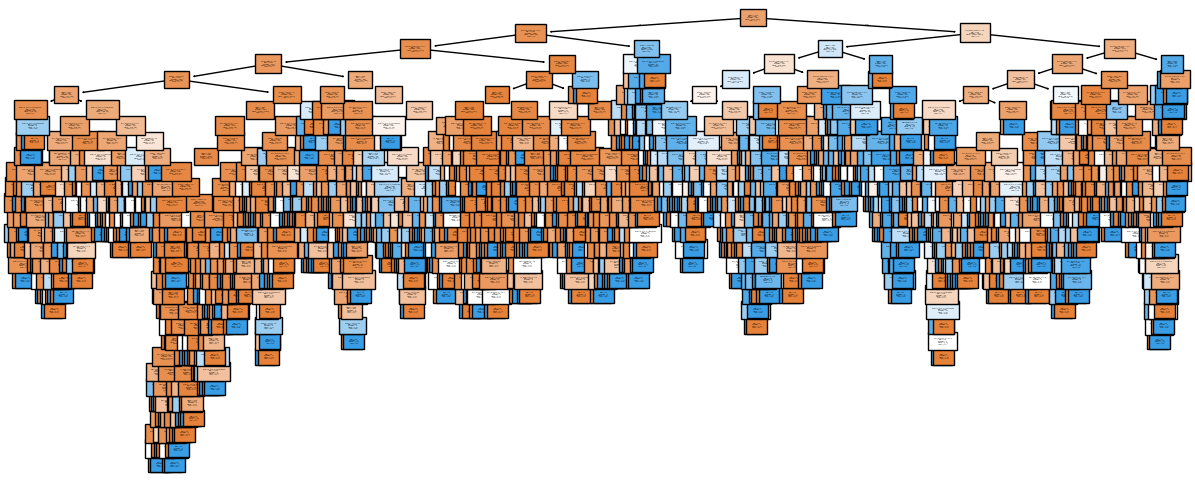

In [ ]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1, feature_names = nome_colunas);

In [ ]:
arvore.score(x_treino, y_treino)

1.0

In [ ]:
arvore = DecisionTreeClassifier(max_depth = 4, random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [ ]:
arvore.score(x_treino, y_treino)

0.8509333333333333

In [ ]:
arvore.score(x_teste, y_teste)

0.8464

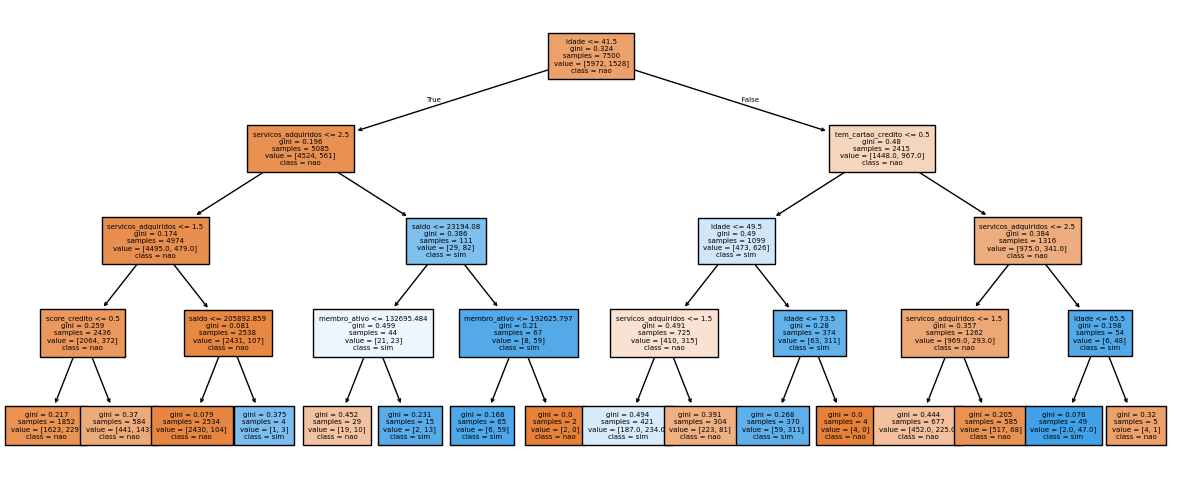

In [ ]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 5, feature_names = nome_colunas);

#   Método KNN e Comparação dos modelos

### Etapa 9:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Aqui faremos a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mormalizacao = MinMaxScaler()
x_treino_normalizado = mormalizacao.fit_transform(x_treino)

In [ ]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,1.0,0.796,0.216216,0.8,0.000000,0.333333,1.0,0.0,0.267600
1,0.0,0.0,1.0,0.0,0.612,0.256757,0.2,0.000000,0.333333,0.0,1.0,0.338919
2,1.0,0.0,0.0,1.0,0.634,0.256757,0.5,0.386645,0.666667,1.0,0.0,0.890516
3,0.0,0.0,1.0,1.0,0.514,0.040541,0.0,0.000000,0.333333,1.0,0.0,0.580365
4,0.0,1.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.0,1.0,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,1.0,0.0,0.609048
7496,0.0,1.0,0.0,1.0,0.676,0.229730,0.6,0.000000,0.000000,1.0,0.0,0.127054
7497,0.0,1.0,0.0,1.0,0.646,0.229730,0.6,0.000000,0.333333,1.0,0.0,0.492884
7498,0.0,0.0,1.0,1.0,0.720,0.202703,0.2,0.000000,0.333333,1.0,0.0,0.364454


### Etapa 10:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta etapa criaremos um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avaliaremos o desempenho nos dados de teste, também normalizados.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [ ]:
x_teste_normalizado = mormalizacao.transform(x_teste)

In [ ]:
knn.score(x_teste_normalizado, y_teste)

0.8172

### Etapa 11:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Iremos avaliar a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nas outras etapas utilizando o método `score` e depois iremos armazenar o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também serão armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [ ]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.7964
Acurácia Árvore: 0.8464
Acurácia KNN: 0.8172


In [ ]:
import pickle

In [ ]:
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)

In [ ]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
    pickle.dump(arvore, arquivo)

In [ ]:
dados

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64,0
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77,0
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52,1


### Etapa final:

Depois que o modelo está em produção, já pode ser utilizado para classificar novos dados. Nesta última etapa faremos a leitura dos arquivos `pickle` dos modelos que foram salvos na etapa anterior e utilizaremos os modelos para fazer a previsão do seguinte registro:

```
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['1'],
    'membro_ativo': ['1'],
    'salario_estimado': [85270.00]
})
```


In [ ]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['1'],
    'membro_ativo': ['1'],
    'salario_estimado': [85270.00]
})

In [ ]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,850,França,Homem,27,3,56000,1,1,1,85270.0


In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [ ]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([0])

## Relatório do Projeto de Análise e Modelagem de Churn de Clientes

Este projeto teve como objetivo principal analisar e modelar o churn de clientes, passando pelas etapas essenciais de um pipeline de Machine Learning. Os principais assuntos e temas abordados foram:

*   **Obtenção e Exploração de Dados:** Leitura e análise inicial do conjunto de dados de churn, incluindo a verificação de dados nulos e a exploração visual das variáveis categóricas (país, sexo biológico e churn) e numéricas (score de crédito, idade, anos de cliente, saldo, serviços adquiridos, tem cartão de crédito, membro ativo e salário estimado) através de histogramas e boxplots para identificar padrões e inconsistências.
*   **Pré-processamento de Dados:** Preparação dos dados para a modelagem, que envolveu a separação entre variáveis explicativas e variável alvo, a transformação de variáveis categóricas em formato numérico utilizando `OneHotEncoder` e a normalização das variáveis numéricas usando `MinMaxScaler` para garantir que todas as características tivessem o mesmo impacto nos modelos.
*   **Modelagem e Avaliação:** Construção e avaliação de diferentes modelos de classificação para prever o churn. Foram implementados e comparados um modelo de base (`DummyClassifier`), uma Árvore de Decisão (`DecisionTreeClassifier`) com profundidade limitada para evitar sobreajuste, e um modelo KNN (`KNeighborsClassifier`) utilizando os dados normalizados. A avaliação do desempenho de cada modelo foi realizada utilizando a métrica de acurácia.